In [1]:
# Initial imports
# Getting rid of the warning message
import warnings 
warnings.filterwarnings('ignore')

import pandas as pd
from dotenv import load_dotenv
import os
from path import Path
from newsapi import NewsApiClient
from nltk.stem import WordNetLemmatizer 
lemmatizer = WordNetLemmatizer()

%matplotlib inline

In [2]:
# Read your api key environment variable
load_dotenv()
api_key = os.getenv("NEWS_API_KEY")
# Create a newsapi client
newsapi = NewsApiClient(api_key=api_key)

In [3]:
# Fetch the Bitcoin news articles
bitcoin_news_en = newsapi.get_everything(
    q="Bitcoin", 
    language="en" 
)

In [4]:
# Fetch the Ethereum news articles
ethereum_news_en = newsapi.get_everything(
    q="Ethereum", 
    language="en" 
)

In [5]:
# Create the Bitcoin sentiment scores DataFrame
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
bitcoin_sentiments = []

for article in bitcoin_news_en["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        bitcoin_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
bitcoin_df = pd.DataFrame(bitcoin_sentiments)

# Reorder DataFrame columns
cols = ["date", "text", "compound", "positive", "negative", "neutral"]
bitcoin_df = bitcoin_df[cols]

bitcoin_df.head()

,date,text,compound,positive,negative,neutral
0,2020-11-12,A former Microsoft software engineer from Ukra...,-0.6705,0.064,0.199,0.737
1,2020-12-03,Visa has partnered with cryptocurrency startup...,0.6369,0.162,0.000,0.838
2,2020-11-12,PayPal is bringing its newly-announced support...,0.2144,0.053,0.000,0.947
3,2020-11-20,"In November 2017, after an absolutely massive,...",0.2023,0.050,0.000,0.950
4,2020-12-06,"Unlike ‘conventional’ cryptocurrencies, a cent...",0.0000,0.000,0.000,1.000


In [6]:
# Create the Ethereum sentiment scores DataFrame
ethereum_sentiments = []

for article in ethereum_news_en["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        ethereum_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
ethereum_df = pd.DataFrame(ethereum_sentiments)

# Reorder DataFrame columns
cols = ["date", "text", "compound", "positive", "negative", "neutral"]
ethereum_df = ethereum_df[cols]

ethereum_df.head()

,date,text,compound,positive,negative,neutral
0,2020-11-12,PayPal is bringing its newly-announced support...,0.2144,0.053,0.0,0.947
1,2020-11-23,FILE PHOTO: Representation of the Ethereum vir...,0.0000,0.000,0.0,1.000
2,2020-11-23,FILE PHOTO: Representation of the Ethereum vir...,0.0000,0.000,0.0,1.000
3,2020-11-23,LONDON (Reuters) - Digital currencies Ethereum...,0.4215,0.088,0.0,0.912
4,2020-12-07,NEW YORK (Reuters) - Institutional investors p...,0.1779,0.052,0.0,0.948


In [7]:
# Describe the Bitcoin Sentiment
bitcoin_df.describe()

,compound,positive,negative,neutral
count,19.000000,19.000000,19.000000,19.000000
mean,0.135189,0.060526,0.025737,0.913737
std,0.379635,0.065557,0.066192,0.098593
min,-0.670500,0.000000,0.000000,0.716000
25%,0.000000,0.000000,0.000000,0.833500
50%,0.000000,0.050000,0.000000,0.950000
75%,0.411700,0.102500,0.000000,1.000000
max,0.765000,0.174000,0.215000,1.000000


In [8]:
# Describe the Ethereum Sentiment
ethereum_df.describe()

,compound,positive,negative,neutral
count,20.000000,20.000000,20.000000,20.000000
mean,0.151905,0.061600,0.016800,0.921600
std,0.322903,0.078815,0.052501,0.103898
min,-0.493900,0.000000,0.000000,0.672000
25%,0.000000,0.000000,0.000000,0.881500
50%,0.000000,0.052000,0.000000,0.948000
75%,0.406800,0.095250,0.000000,1.000000
max,0.877900,0.318000,0.196000,1.000000


In [9]:
#  1. Sentiment Analysis Questions:
print("Questions:")
print("1.1 - Which coin had the highest mean positive score?")
print("1.2 - Which coin had the highest compound score?")    
print("1.3 - Which coin had the highest positive score?")
print("A: Ethereum had the highest mean positive score, the highest compound score and highest positive score")

Questions:
1.1 - Which coin had the highest mean positive score?
1.2 - Which coin had the highest compound score?
1.3 - Which coin had the highest positive score?
A: Ethereum had the highest mean positive score, the highest compound score and highest positive score


In [10]:
# 2. Natural Language Processing
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [11]:
# Expand the default stopwords list if necessary
wnl = WordNetLemmatizer()
stop = stopwords.words("english")
stop.append("it'")
stop.append("'s")
stop.append("t")
stop = set(stop)

In [12]:
# Complete the tokenizer function
def tokenizer(text):
    # Create a list of the words
    words = word_tokenize(text)
    # Convert the words to lowercase
    words = list(filter(lambda w: w.lower(), words))
    # Remove the punctuation
    words = list(filter(lambda t: t not in punctuation, words))
    # Remove the stop words
    words = list(filter(lambda t: t.lower() not in stop, words))
    # Lemmatize Words into root words
    tokens = [wnl.lemmatize(word) for word in words]
    return tokens

In [13]:
# Create a new tokens column for Bitcoin
bitcoin_df["tokens"] = bitcoin_df.text.apply(tokenizer)
bitcoin_df.head()

,date,text,compound,positive,negative,neutral,tokens
0,2020-11-12,A former Microsoft software engineer from Ukra...,-0.6705,0.064,0.199,0.737,"[former, Microsoft, software, engineer, Ukrain..."
1,2020-12-03,Visa has partnered with cryptocurrency startup...,0.6369,0.162,0.000,0.838,"[Visa, partnered, cryptocurrency, startup, Blo..."
2,2020-11-12,PayPal is bringing its newly-announced support...,0.2144,0.053,0.000,0.947,"[PayPal, bringing, newly-announced, support, c..."
3,2020-11-20,"In November 2017, after an absolutely massive,...",0.2023,0.050,0.000,0.950,"[November, 2017, absolutely, massive, two-mont..."
4,2020-12-06,"Unlike ‘conventional’ cryptocurrencies, a cent...",0.0000,0.000,0.000,1.000,"[Unlike, ‘, conventional, ’, cryptocurrencies,..."


In [14]:
# Create a new tokens column for Ethereum
ethereum_df["tokens"] = ethereum_df.text.apply(tokenizer)
ethereum_df.head()

,date,text,compound,positive,negative,neutral,tokens
0,2020-11-12,PayPal is bringing its newly-announced support...,0.2144,0.053,0.0,0.947,"[PayPal, bringing, newly-announced, support, c..."
1,2020-11-23,FILE PHOTO: Representation of the Ethereum vir...,0.0000,0.000,0.0,1.000,"[FILE, PHOTO, Representation, Ethereum, virtua..."
2,2020-11-23,FILE PHOTO: Representation of the Ethereum vir...,0.0000,0.000,0.0,1.000,"[FILE, PHOTO, Representation, Ethereum, virtua..."
3,2020-11-23,LONDON (Reuters) - Digital currencies Ethereum...,0.4215,0.088,0.0,0.912,"[LONDON, Reuters, Digital, currency, Ethereum,..."
4,2020-12-07,NEW YORK (Reuters) - Institutional investors p...,0.1779,0.052,0.0,0.948,"[NEW, YORK, Reuters, Institutional, investor, ..."


In [15]:
#  NGrams and Frequency Analysis
from collections import Counter
from nltk import ngrams

In [16]:
# Generate the Bitcoin N-grams where N=2
grams_bitcoins = ngrams(tokenizer(bitcoin_df.text.str.cat()), 2)
word_counts_bitcoin = Counter(grams_bitcoins)

In [17]:
# Generate the Ethereum N-grams where N=2
grams_ethereum = ngrams(tokenizer(ethereum_df.text.str.cat()), 2)
word_counts_ethereum = Counter(grams_ethereum)

In [18]:
# Use the token_count function to generate the top 10 words from each coin
def token_count(tokens, N=3):
    top_10 = (dict(tokens.most_common(10)))
    return Counter(tokens).most_common(N)

In [19]:
# Get the top 10 words for Bitcoin
token_count(word_counts_bitcoin)

[(('FILE', 'PHOTO'), 5),
 (('virtual', 'currency'), 4),
 (('currency', 'Bitcoin'), 3)]

In [20]:
# Get the top 10 words for Ethereum
token_count(word_counts_ethereum)

[(('virtual', 'currency'), 8),
 (('FILE', 'PHOTO'), 7),
 (('char', 'Reuters'), 6)]

In [21]:
# Word Clouds
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

In [22]:
def process_text(doc):
    sw = set(stopwords.words('english'))
    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub('', doc)
    words = word_tokenize(re_clean) 
    words = list(filter(lambda t: t.lower() not in stop, words))
    lem = [lemmatizer.lemmatize(word) for word in words]
    output = [word.lower() for word in lem if word.lower() not in sw]
    return ' '.join(output)

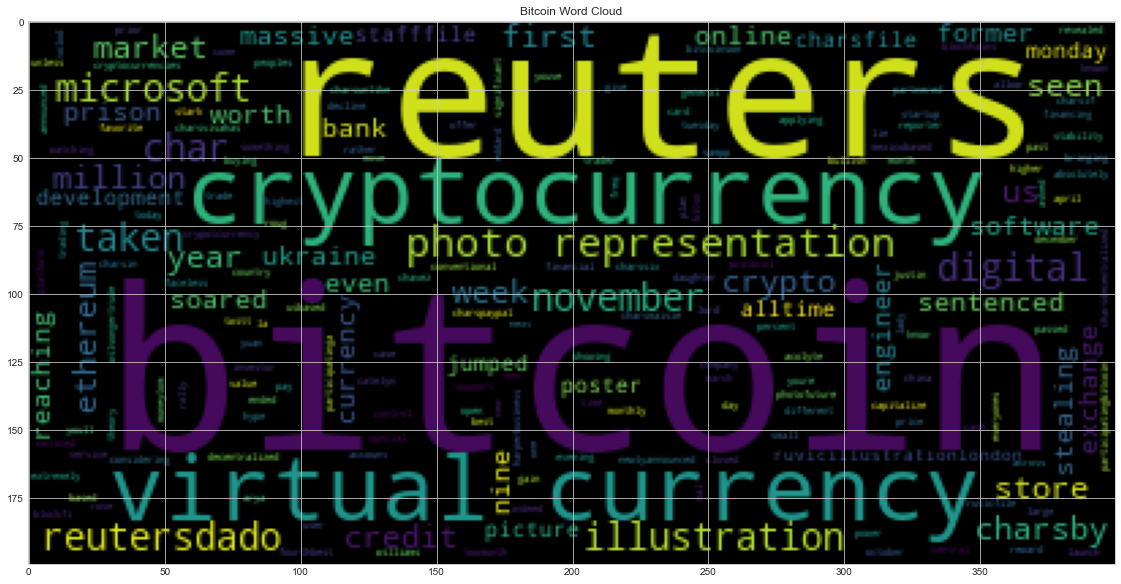

In [23]:
# Generate the Bitcoin word cloud
big_string_bit = ''.join(bitcoin_df.text.str.cat())
big_string_bitcoin = process_text(big_string_bit)
plt.title('Bitcoin Word Cloud')
wc_bit = WordCloud().generate(big_string_bitcoin)
plt.imshow(wc_bit)
plt.savefig("bitcoin_word_cloud.png")

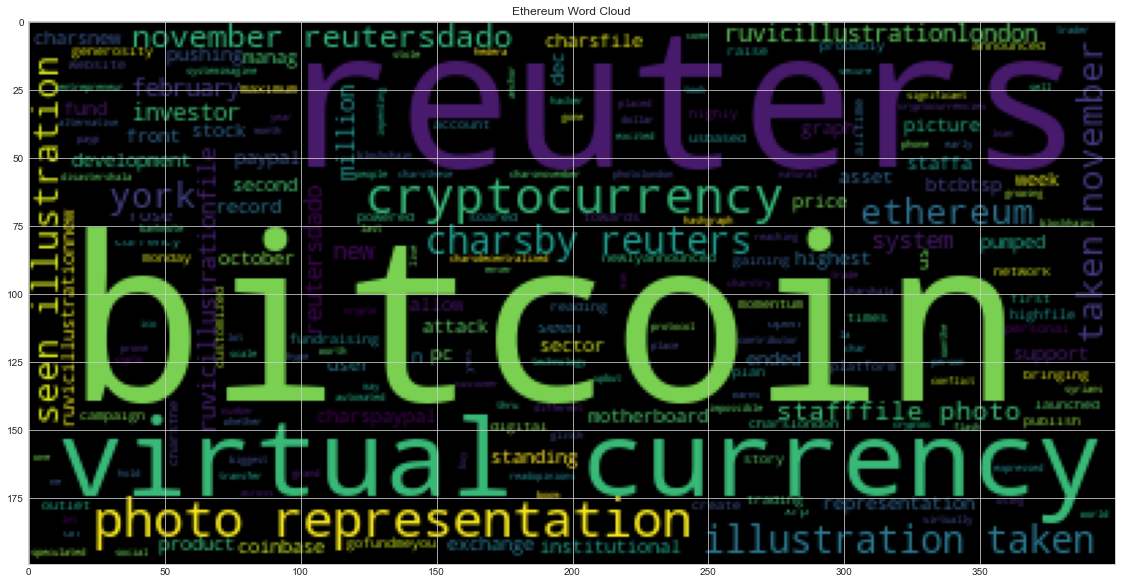

In [24]:
# Generate the Ethereum word cloud
big_string_ethe = ''.join(ethereum_df.text.str.cat())
big_string_ethereum = process_text(big_string_ethe)
plt.title('Ethereum Word Cloud')
wc_bit = WordCloud().generate(big_string_ethereum)
plt.imshow(wc_bit)
plt.savefig("ethereum_word_cloud.png")

In [25]:
# 3. Named Entity Recognition
import spacy
from spacy import displacy

In [26]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

In [27]:
#Bitcoin NER
# Concatenate all of the Bitcoin text together
bitcoin_concat =[]
for text in bitcoin_df.loc[:,"text"]:
    bitcoin_concat.append(text)

In [28]:
# Run the NER processor on all of the text
text_bitcoin = ' '.join(map(str, bitcoin_concat))
process_bit = process_text(text_bitcoin)
doc_bitcoin = nlp(process_bit)

# Add a title to the document
doc_bitcoin.user_data["title"] = "Bitcoin NER"

In [29]:
# Render the visualization
bit = displacy.render(doc_bitcoin, style='ent')

In [30]:
# List all Entities
for entity in doc_bitcoin.ents:
    print(entity.text, entity.label_)

microsoft ORG
ukraine GPE
nine year DATE
million CARDINAL
first ORDINAL
bitcoin GPE
october DATE
november DATE
first ORDINAL
next day DATE
central bank ORG
digital yuan ORG
peoples bank ORG
china GPE
past week DATE
bitcoin GPE
hype lie general mal ORG
six year DATE
million CARDINAL
november DATE
today DATE
november DATE
monthly DATE
april fourthbest month DATE
williams PERSON
arya stark PERSON
lady catelyn lord PERSON
eddard acolyte PERSON
monday DATE
twitt char ORG
microsoft ORG
ukraine GPE
nine year DATE
million CARDINAL
tuesday evening TIME
december DATE
chavez PERSON
justin harperbusiness PERSON
bbc newsimage PERSON
cur char PERSON
bitcoin grabbed GPE
headline week DATE
november DATE
reutersdado ruvicillustrationtokyo ORG
february DATE
reutersdado ruvicillustrationlondon ORG
london reuters ORG
monday DATE
us GPE
reutersdado ruvicillustrationlondon reuters PERSON


In [31]:
# Ethereum NER
# Concatenate all of the Ethereum text together
ethereum_concat =[]
for text in ethereum_df.loc[:,"text"]:
    ethereum_concat.append(text)

In [32]:
# Run the NER processor on all of the text
text_ethereum = ' '.join(map(str, ethereum_concat))
process_ethe = process_text(text_ethereum)
doc_ethereum = nlp(process_ethe)

# Add a title to the document
doc_ethereum.user_data["title"] = "Ethereum NER"

In [33]:
# Render the visualization
displacy.render(doc_ethereum, style='ent')

In [34]:
# List all Entities
for entity in doc_ethereum.ents:
    print(entity.text, entity.label_)

october DATE
february DATE
reutersdado ruvicillustrationlondon reuters ORG
february DATE
reutersdado ruvicillustrationlondon ORG
london reuters digital currency ethereum xrp ORG
monday DATE
new york reuters institutional ORG
million CARDINAL
week ended DATE
second ORDINAL
new york reuters institutional ORG
million CARDINAL
week ended DATE
second ORDINAL
november DATE
reuters ORG
november DATE
new york times ORG
un ORG
early february year DATE
one CARDINAL
last month DATE
october DATE
million CARDINAL
november DATE
min ORG
reuters ORG
november DATE
reutersdado ruvicillustrationnew york ORG
reuters ORG
november DATE
reutersdado ruvicillustrationnew york ORG
reuters ORG
us GPE
reutersdado ruvicillustrationlondon reuters PERSON
reuters ORG
november DATE
photolondon reuters bitcoin ORG
hedera ORG
syrians NORP
systemimagine glitch cypto PERSON
bitcoin GPE
